In [1]:
from sklearn.cluster import KMeans
import clusters as cl
from sklearn.datasets import make_blobs
import minisom
from minisom import MiniSom 
import pandas as pd
import numpy as np

# this will reload modules that have changed
%load_ext autoreload
%autoreload 2

In [2]:
data, y = make_blobs(n_samples=20, centers=2, n_features=2,
...                   random_state=0)
>>> print(data)


[[ 1.84070628  3.56162231]
 [ 1.00671456 -0.52235428]
 [ 1.28933778  3.44969159]
 [ 1.9263585   4.15243012]
 [ 2.84382807  3.32650945]
 [ 1.42013331  4.63746165]
 [ 0.87305123  4.71438583]
 [ 2.21021495  1.27582618]
 [ 4.32502215 -0.55670201]
 [-1.57671974  4.95740592]
 [ 2.10102604  0.71047981]
 [ 1.16748177 -1.08313281]
 [ 3.58804674  2.36702243]
 [ 1.12031365  5.75806083]
 [ 1.6679407   0.59536091]
 [ 3.2855582   2.10004351]
 [ 1.70735537  1.05401263]
 [ 0.34899733  2.84843906]
 [ 2.47034915  4.09862906]
 [ 1.7373078   4.42546234]]


In [3]:
# normalize the data
data = cl.normalize(data)

Create data and data labels for each point

In [4]:
k = cl.K(data)
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(n_clusters=4)

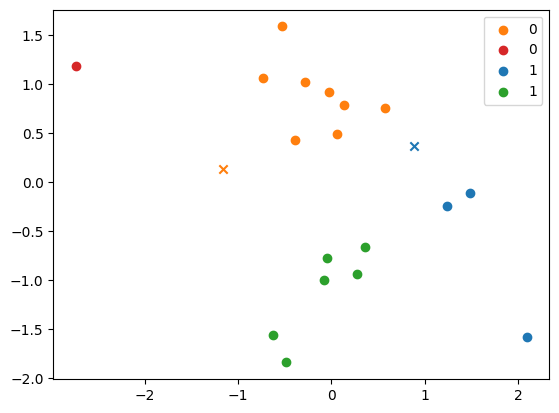

In [5]:
#cl.plotKMeans(data, kmeans.labels_, None)
cl.plotKMeans(data, kmeans.labels_, y)

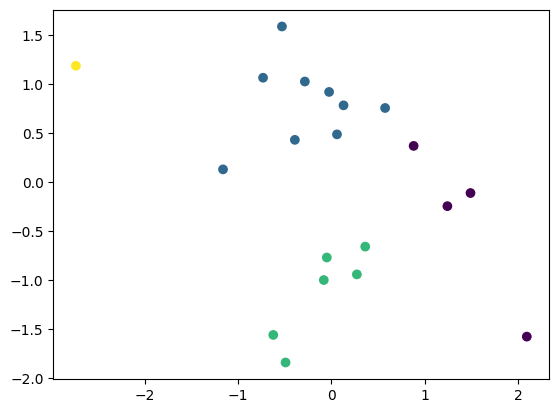

In [6]:
cl.plotKMeans(data, kmeans.labels_)
#cl.plotKMeans(data, kmeans.labels_, y)

In [7]:
print(y)
print(kmeans.labels_)

[0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0]
[1 2 1 1 0 1 1 2 0 3 2 2 0 1 2 0 2 1 1 1]


In [8]:
cl.labelClusters(kmeans.labels_, y)

{1: 0, 2: 1, 0: 1, 3: 0}

In [9]:
cl.getClusters(data, y)

(0, 1, 4)

In [ ]:
cl.randIndex(kmeans.labels_, y)

In [ ]:
cl.plotKMeans(data, kmeans.labels_)

In [ ]:
cl.plotKMeans(data, y)

In [ ]:
def use_kmeans(da, la):
    k = cl.K(data)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(da)
    
    #cl.plotKMeans(data, tlabels)
    
    return kmeans, cl.randIndex(kmeans.labels_, la), k

In [ ]:
use_kmeans(data, y)

In [ ]:
#som = MiniSom(300, 300, 2, sigma=0.3, learning_rate=0.3) # initialization of 6x6 SOM
## Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=2.5, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 100 iterations

In [ ]:
som.winner(data[0])

In [ ]:
somlist = []

In [ ]:
#MAKE BMU LIST
for x in range(len(data)):
    somlist.append(som.winner(data[x]))
print(somlist)

In [ ]:
use_kmeans(somlist, y)

In [ ]:
use_kmeans(somlist, kmeans.labels_)

In [ ]:
print(somlist)

In [ ]:
cl.assignClusters(kmeans.labels_, y)